# Hypothesis testing on weather paying the lunch affects student's math exam score

In this I will poses data from [Here](https://www.kaggle.com/datasets/desalegngeb/students-exam-scores) which has 1000 entries of students exam scores, with 9 features, from which the interesing to us is the `math score` and `lunch`

## More about data
`lunch` has value `free/reduced` if the students are getting free lunch or the price is reduced, `standard` otherwise.


## Loading data

In [38]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import math
from scipy import stats

In [61]:
data = pd.read_csv('exams.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


## Hypothesis testing

H0: The average is the same

H1: The average of math score of the studnets who get standard lunch is greater than the average of all students together.

Since the sample size is 1000, I will conduct Z-test.

Let's set`97.5%` condifence level, which means `alpha = 0.025`, and `z-value: 1.96` 

Let's see how each histogram looks like.

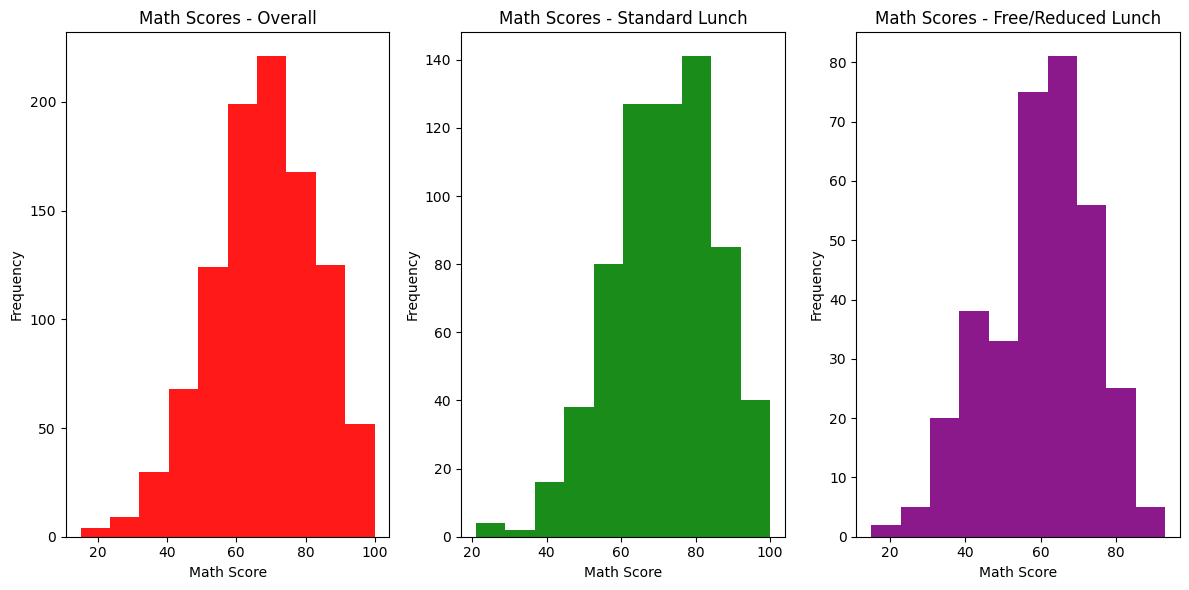

In [71]:
standard_lunch = data[data['lunch'] == 'standard']['math score']
reduced_lunch = data[data['lunch'] == 'free/reduced']['math score']

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.hist(data["math score"], bins=10, color='red', alpha=0.9)
plt.title('Math Scores - Overall')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(standard_lunch, bins=10, color='green', alpha=0.9)
plt.title('Math Scores - Standard Lunch')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(reduced_lunch, bins=10, color='purple', alpha=0.9)
plt.title('Math Scores - Free/Reduced Lunch')
plt.xlabel('Math Score')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [74]:
print("Mean of overall sample:", data["math score"].mean())
print("Mean of standard lunch:", standard_lunch.mean())

Mean of overall sample: 67.81
Mean of standard lunch: 71.88484848484849


### We see that the the mean of overall sample and the sample with people taking standard lunch is differing, let's test to see if it's significant enough to reject the null hypothesis

In [75]:
z = (standard_lunch.mean() - data["math score"].mean()) / (standard_lunch.std() / math.sqrt(len(standard_lunch) - 1))
z

7.335988852404727

Since `7.33 > 1.96`, we can reject the null hypothesis.